# Quality and Cost: A Review of Home Health Care Agency Data

**Introduction**

The United States Centers for Medicare & Medicaid Services (CMS) is the federal government entity that oversees the Medicare and Medicaid insurance policies provided by the United States federal government. These health insurance policies insure specific vulnerable populations: Medicare typically serves adults over age 65, some younger people with disabilities and those with End-Stage Renal Disease, and Medicaid is a federal and state health insurance program for some people who have limited income or resources. Each of these insurance policies covers in-home health care for qualifying patients.

As a national regulatory agency and federal health insurance provider, the Centers for Medicare & Medicaid Services also tracks a myriad of metrics regarding access, quality assurance and cost of healthcare in the United States. There are clear ethical reasons for Medicare/Medicaid to investigate and correct quality assurance deficiencies in regards to home healthcare, as well as compelling budgetary reasons to reduce rates of poor care, which can cause preventable infection, falls, hospital readmissions and other increases in a patient’s treatment needs.

The CMS “Home Health Care Agencies” dataset compiles state averages of Home Health Agency demographic and quality measurements, including metrics such as area-wide frequency of hospital admission for home health patients and frequency of improvement in patient ambulation. 


**Proposal**

I plan to use the “Home Health Care Agencies” dataset to investigate whether the quality metrics tracked can predict Medicare costs, hypothesizing that lower quality care is linked to higher comparative Medicare cost. The features in the dataset which address quality of care, features regarding hospital admission, improving patient mobility, documentation of flu shots are all regarding issues decreasing patient outcomes and potential increase in patient costs. The target variable in this case is measured in the dataset as medical spending on care for one particular agency as compared to medicare spending across all agencies nationally. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 14
plt.style.use('fivethirtyeight')

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# The Centers for Medicare & Medicaid Services - 
# Home Health Care Agencies
# https://data.cms.gov/provider-data/dataset/tee5-ixt5
hhc_csv = '/Users/LiaG/Desktop/datasets/HH_Provider_July2021.csv'

df = pd.read_csv(hhc_csv, encoding='latin-1', parse_dates=['Date Certified'])

In [3]:
df.head()

,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,Footnote for quality of patient care star rating,How often the home health team began their patients' care in a timely manner,Footnote for how often the home health team began their patients' care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,Footnote for how often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,Footnote for how often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,Footnote for how often patients got better at walking or moving around,How often patients got better at getting in and out of bed,Footnote for how often patients got better at getting in and out of bed,How often patients got better at bathing,Footnote for how often patients got better at bathing,How often patients' breathing improved,Footnote for how often patients' breathing improved,How often patients got better at taking their drugs correctly by mouth,Footnote for how often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,Footnote for how often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted","Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,Footnote Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Footnote for how often physician-recommended actions to address medication issues were completely timely,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,Footnote for DTC Risk-Standardized Rate,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,Footnote for PPR Risk-Standardized Rate,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
0,AL,17000,ALABAMA DEPARTMENT OF PUBLIC HEALTH HOME CARE,"201 MONROE STREET, THE RSA TOWER, SUITE 1200",MONTGOMERY,36104,3342065341,GOVERNMENT - STATE/COUNTY,Yes,Yes,Yes,Yes,Yes,Yes,1966-07-01,4.0,NaN,93.4,NaN,98.8,NaN,55.3,NaN,86.3,NaN,84.6,NaN,86.6,NaN,81.4,NaN,78.9,NaN,14.4,NaN,15.8,NaN,0.00,NaN,91.6,NaN,845.0,1066.0,79.27,88.24,85.77,90.90,Better Than National Rate,NaN,16.0,434.0,3.69,3.34,2.50,4.39,Same As National Rate,NaN,0.89,NaN,2130
1,AL,17009,ENCOMPASS HEALTH HOME HEALTH,2970 LORNA ROAD,BIRMINGHAM,35216,2058242680,PROPRIETARY,Yes,Yes,Yes,Yes,Yes,Yes,1973-01-18,3.5,NaN,97.1,NaN,99.6,NaN,75.4,NaN,83.2,NaN,80.2,NaN,83.4,NaN,82.1,NaN,79.4,NaN,16.0,NaN,12.1,NaN,0.00,NaN,98.1,NaN,6741.0,8969.0,75.16,81.10,80.10,82.27,Better Than National Rate,NaN,208.0,7190.0,2.89,2.95,2.60,3.31,Better Than National Rate,NaN,0.99,NaN,19072
2,AL,17013

#### Data dictionary

HH_Provider_MMMYYYY.csv (60 columns)
This file contains information on the home health agency, the type of services offered to patients, and the values of the star rating and patient outcome and process quality measures reported for home health on Care Compare.

The columns include the following information:
1. **State** (Text) – The two character postal code for the state or territory in which the home health agency is located.
2. **CMS Certification Number (CCN)** (Text) – The six character identification number assigned to the home health agency by CMS.
3. **Provider Name** (Text) – The name of the home health agency as it appears in the CMS certification system.
4. **Address** (Text) – The street address of the home health agency.
5. **City** (Text) – The city in which the home health agency is located.
6. **ZIP** (Text) – The five-digit ZIP code of the home health agency.
7. **Phone** (Text) – The ten-digit telephone number of the home health agency.
8. **Type of Ownership** (Text) – The general control type of the home health agency. Categories include:
    • Voluntary Non-Profit – Religious Affiliation
    • Voluntary Non-Profit – Private
    • Voluntary Non-Profit – Other
    • Proprietary
    • Government – State/County
    • Government – Combination Government and Voluntary
    • Government – Local
9. **Offers Nursing Care Services** (Text) – Yes or No
10. **Offers Physical Therapy Services** (Text) – Yes or No
11. **Offers Occupational Therapy Services** (Text) – Yes or No
12. **Offers Speech Pathology Services** (Text) – Yes or No
13. **Offers Medical Social Services** (Text) – Yes or No
14. **Offers Home Health Aide Services** (Text) – Yes or No
15. **Date Certified** (Date) – The original date the home health agency was certified to participate in the Medicare program.
16. **Quality of patient care star rating** (Numeric) – A numeric rating from 1 through 5, in increments of 0.5.
17. **Footnote for quality of patient care star rating** (Text) –If the rating value is missing (blank), the reason the rating was not calculated is explained here.
18. **How often the home health team began their patients' care in a timely manner** (Numeric) – The measure percentage as reported on Care Compare.
19. **Footnote for how often the home health team began their patients' care in a timely manner** (Text) – If the measure value is missing (blank), the reason the measure was not calculated is explained here.
20. **How often the home health team taught patients (or their family caregivers) about their drugs** (Numeric) – The measure percentage as reported on Care Compare.
21. **Footnote for how often the home health team taught patients (or their family caregivers) about their drugs** (Text) –If the measure value is missing (blank), the reason the measure was not calculated is explained here.
22. **How often the home health team determined whether patients received a flu shot for the current flu season** (Numeric) – The measure percentage as reported on Care Compare.
23. **Footnote for how often the home health team determined whether patients received a flu shot for the current flu season (Text) – If the measure value is missing** (blank), the reason the measure was not calculated is explained here.
24. **How often patients got better at walking or moving around** (Numeric) – The measure percentage as reported on Care Compare.
25. **Footnote for how often patients got better at walking or moving around** (Text) – If the measure value is missing (blank), the reason the measure was not calculated is explained here.
26. **How often patients got better at getting in and out of bed** (Numeric) – The measure percentage as reported on Care Compare.
27. **Footnote for how often patients got better at getting in and out of bed** (Text) – If the measure value is missing (blank), the reason the measure was not calculated is explained here.
28. **How often patients got better at bathing** (Numeric) – The measure percentage as reported on Care Compare.
29. **Footnote for how often patients got better at bathing** (Text) – If the measure value is missing (blank), the reason the measure was not calculated is explained here.
30. **How often patients' breathing improved** (Numeric) – The measure percentage as reported on Care Compare.
31. **Footnote for how often patients' breathing improved** (Text) – If the measure value is missing (blank), the reason the measure was not calculated is explained here.
32. **How often patients got better at taking their drugs correctly by mouth** (Numeric) – The measure percentage as reported on Care Compare.
33. **Footnote for how often patients got better at taking their drugs correctly by mouth** (Text)– If the measure value is missing (blank), the reason the measure was not calculated is explained here.
34. **How often home health patients had to be admitted to the hospital** (Numeric) – The measure percentage as reported on Care Compare.
35. **Footnote for how often home health patients had to be admitted to the hospital** (Text) – If the measure value is missing (blank), the reason the measure was not calculated is explained here.
36. **How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted** (Numeric) – The measure percentage as reported on Care Compare.
37. **Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted** (Text) – If the measure value is missing (blank), the reason the measure was not calculated is explained here.
38. **Changes in skin integrity post-acute care: pressure ulcer/injury** (Numeric) – The measure percentage as reported on Care Compare.
39. **Footnote for changes in skin integrity post-acute care: pressure ulcer/injury** (Text) – If the measure value is missing (blank), the reason the measure was not calculated is explained here.
40. **How often physician-recommended actions to address medication issues were completely timely**
41. **Footnote for how often physician-recommended actions to address medication issues were completely timely**
42. **DTC Numerator** (Numeric) - Observed Number of Discharges to Community
43. **DTC Denominator** (Numeric) - Number of Eligible Stays for DTC Measure
44. **DTC Observed Rate** (Numeric) - Observed Discharge to Community Rate
45. **DTC Risk-Standardized Rate** (Numeric) - Risk-Standardized Discharge to Community Rate
46. **DTC Risk-Standardized Rate** (Lower Limit) (Numeric) - Lower Limit of the 95% Confidence Interval on the Risk- Standardized Discharge to Community Rate
47. **DTC Risk-Standardized Rate** (Upper Limit) (Numeric) - Upper Limit of the 95% Confidence Interval on the Risk- Standardized Discharge to Community Rate
48. **DTC Performance Categorization** (Text) - DTC Comparative Performance Category: One of the following descriptive phrases: “Better than National Rate”, “Worse than National Rate”, or “Same as National Rate”
49. **Footnote for DTC Risk-Standardized Rate** (Text) - If the measure value is missing (blank), the reason the measure was not calculated is explained here.
50. **PPR Numerator** (Numeric) - Observed Number of Potentially Preventable Readmissions Following Discharge
51. **PPR Denominator** (Numeric) - Number of Eligible Stays for PPR Measure
52. **PPR Observed Rate** (Numeric) - Observed Potentially Preventable Readmissions Rate
53. **PPR Risk-Standardized Rate** (Numeric) - Risk-Standardized Potentially Preventable Readmissions Rate
54. **PPR Risk-Standardized Rate** (Lower Limit) (Numeric) - Lower Limit of the 95% Confidence Interval on the Risk- Standardized Potentially Preventable Readmissions Rate
55. **PPR Risk-Standardized Rate** (Upper Limit) (Numeric) - Upper Limit of the 95% Confidence Interval on the Risk- Standardized Potentially Preventable Readmissions Rate
56. **PPR Performance Categorization** (Text) - PPR Comparative Performance Category: One of the following descriptive phrases: “Better than National Rate”, “Worse than National Rate”, or “Same as National Rate”
57. **Footnote for PPR Risk-Standardized Rate** (Text) - If the measure value is missing (blank), the reason the measure was not calculated is explained here.
58. **How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally** (Numeric) - The measure value as reported on Care Compare
59. **Footnote for How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally** (Text) - If the measure value is missing (blank), the reason the measure was not calculated is explained here.
60. **Number of episodes of care used to calculate how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally.**

In [4]:
df.shape

(11176, 60)

#### Rename Columns

In [5]:
df.columns

Index(['State', 'CMS Certification Number (CCN)', 'Provider Name', 'Address',
       'City', 'ZIP', 'Phone', 'Type of Ownership',
       'Offers Nursing Care Services', 'Offers Physical Therapy Services',
       'Offers Occupational Therapy Services',
       'Offers Speech Pathology Services', 'Offers Medical Social Services',
       'Offers Home Health Aide Services', 'Date Certified',
       'Quality of patient care star rating',
       'Footnote for quality of patient care star rating',
       'How often the home health team began their patients' care in a timely manner',
       'Footnote for how often the home health team began their patients' care in a timely manner',
       'How often the home health team taught patients (or their family caregivers) about their drugs',
       'Footnote for how often the home health team taught patients (or their family caregivers) about their drugs',
       'How often the home health team determined whether patients received a flu shot for the cu

In [6]:
import re

In [7]:
# Rename columns for ease of use
column_names = []

for column in df.columns:
    column = re.sub(r"patients?", "pt", column)
    column = column.replace(" ", "_").lower()
    column = column.replace("offers_", "")
    column = column.replace("(lower_limit)", "min")
    column = column.replace("(upper_limit)", "max")
    column = column.replace("_services", "")
    column = column.replace("how_often_", "freq_")
    column_names.append(column)
    
df.columns = column_names

In [8]:
# Individual column rename
df.rename(columns={
    "cms_certification_number_(ccn)": "cms_cert_number(ccn)",
    "type_of_ownership": "ownership_type",
    "nursing_care_services": "nursing_services",
    "quality_of_pt_care_star_rating": "quality_rating",
    "freq_the_home_health_team_began_their_pt'_care_in_a_timely_manner": "freq_timely_care",
    "freq_the_home_health_team_taught_pt_(or_their_family_caregivers)_about_their_drugs": "freq_rx_ed",
    "freq_the_home_health_team_determined_whether_pt_received_a_flu_shot_for_the_current_flu_season": "freq_flu_shot_documented",
    "freq_pt_got_better_at_walking_or_moving_around": "freq_pt_improved_ambulation",
    "freq_pt_got_better_at_getting_in_and_out_of_bed": "freq_pt_improved_bed_mobility", 
    "freq_pt_got_better_at_bathing": "freq_pt_improved_bathing",
    "freq_pt'_breathing_improved": "freq_pt_improved_breathing",
    "freq_pt_got_better_at_taking_their_drugs_correctly_by_mouth": "freq_pt_improved_rx_po",
    "freq_home_health_pt_had_to_be_admitted_to_the_hospital": "freq_pt_admit",
    "freq_pt_receiving_home_health_care_needed_urgent,_unplanned_care_in_the_er_without_being_admitted": "freq_er_no_admit",
    "changes_in_skin_integrity_post-acute_care:_pressure_ulcer/injury": "freq_post-acute_pressure_ulcer/injury",
    "freq_physician-recommended_actions_to_address_medication_issues_were_completely_timely": "freq_md_rec_completed_ontime",
    "how_much_medicare_spends_on_an_episode_of_care_at_this_agency,_compared_to_medicare_spending_across_all_agencies_nationally": "episodic_medicare_spending",
    "no._of_episodes_to_calc_how_much_medicare_spends_per_episode_of_care_at_agency,_compared_to_spending_at_all_agencies_(national)": "num_episodes"
},
    inplace=True
)

In [9]:
# Change 'footnote' nomenclature to match column to which they refer
for i in range(len(df.columns)):
    if 'footnote_' in df.columns[i]:
        new_name = 'footnote_' + df.columns[i-1]
        df.rename(columns={df.columns[i]: new_name}, inplace=True)

### EDA

In [10]:
df.info()
# Lots of null values in 'footnotes' columns
# Also a few thousand NaNs in our target value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11176 entries, 0 to 11175
Data columns (total 60 columns):
state                                             11176 non-null object
cms_cert_number(ccn)                              11176 non-null int64
provider_name                                     11176 non-null object
address                                           11176 non-null object
city                                              11176 non-null object
zip                                               11176 non-null int64
phone                                             11176 non-null int64
ownership_type                                    11176 non-null object
nursing_care                                      11176 non-null object
physical_therapy                                  11176 non-null object
occupational_therapy                              11176 non-null object
speech_pathology                                  11176 non-null object
medical_social                

In [11]:
# Change categorical features with int dtype to string/object:
#  'ccn', 'zip', 'phone', and 'quality_rating'
df = df.astype({'cms_cert_number(ccn)': 'object',
                'zip': 'object',
                'phone': 'object',
                'quality_rating': 'object'})

In [12]:
df.describe()

,freq_timely_care,freq_rx_ed,freq_flu_shot_documented,freq_pt_improved_ambulation,freq_pt_improved_bed_mobility,freq_pt_improved_bathing,freq_pt_improved_breathing,freq_pt_improved_rx_po,freq_pt_admit,freq_er_no_admit,freq_post-acute_pressure_ulcer/injury,freq_md_rec_completed_ontime,dtc_numerator,dtc_denominator,dtc_observed_rate,dtc_risk-standardized_rate,dtc_risk-standardized_rate_min,dtc_risk-standardized_rate_max,ppr_numerator,ppr_denominator,ppr_observed_rate,ppr_risk-standardized_rate,ppr_risk-standardized_rate_min,ppr_risk-standardized_rate_max,episodic_medicare_spending,num_episodes
count,8909.000000,8886.000000,8621.000000,8318.000000,8249.000000,8334.000000,8106.000000,8151.000000,7696.000000,7696.000000,8400.000000,8886.000000,8732.000000,9928.000000,8732.000000,8732.000000,8732.000000,8732.000000,7201.000000,9600.000000,7201.000000,7201.000000,7201.000000,7201.000000,9238.000000,11176.000000
mean,94.010360,97.079305,74.351920,74.687437,75.871645,77.958819,76.057895,69.433358,15.019802,12.800377,0.139992,91.008080,537.743129,601.601732,72.414054,77.730303,71.560684,83.510431,19.137481,413.591250,3.913277,3.518075,2.594540,4.732279,0.967738,871.038028
std,8.286161,6.941654,18.354312,13.547522,14.239303,14.074705,17.296109,15.641317,3.945838,4.293707,0.252289,15.058416,1093.284551,1267.060367,16.447065,15.395034,17.741570,13.115066,43.213700,1058.296864,2.659325,0.346889,0.320561,0.489590,0.139912,1688.352710
min,4.700000,2.900000,0.000000,9.400000,11.000000,2.600000,0.000000,4.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.550000,2.490000,5.570000,0.000000,1.000000,0.000000,2.350000,1.770000,2.870000,0.340000,0.000000
25%,92.300000,97.300000,67.600000,68.400000,69.500000,72.300000,70.000000,60.700000,12.800000,10.200000,0.000000,90.600000,71.000000,63.000000,66.670000,72.467500,64.040000,79.280000,3.000000,20.000000,2.380000,3.320000,2.390000,4.460000,0.890000,71.000000
50%,97.200000,99.200000,78.600000,77.400000,79.600000,81.100000,80.700000,71.900000,15.000000,12.800000,0.070000,96.500000,215.000000,224.000000,77.140000,82.620000,77.300000,87.170000,7.000000,100.000000,3.470000,3.480000,2.520000,4.770000,0.970000,365.000000
75%,99.200000,99.900000,86.300000,83.300000,84.900000,87.000000,87.300000,79.700000,17.100000,15.200000,0.200000,98.800000,565.250000,623.250000,83.272500,88.000000,84.100000,91.940000,19.000000,387.000000,4.840000,3.670000,2.720000,5.020000,1.050000,958.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,42.400000,41.600000,4.570000,100.000000,33872.000000,41290.000000,100.000000,103.810000,100.230000,121.550000,1155.000000,33961.000000,25.000000,7.550000,6.260000,8.840000,2.190000,54344.000000


**Episodic Medicare Spending EDA**

In [13]:
# Nulls for target value:
#   episodic_medicare_spending = 1938
#   footnote_episodic_medicare_spending = 9238
# df.shape == (11176, 60)

print(f"Nulls for episodic_medicare_spending: {df.episodic_medicare_spending.isnull().sum()}")
print(f"Nulls for footnote_episodic_medicare_spending: {df.footnote_episodic_medicare_spending.isnull().sum()}")

Nulls for episodic_medicare_spending: 1938
Nulls for footnote_episodic_medicare_spending: 9238


In [14]:
# 'footnote_episodic_medicare_spending' should give reasons for NaNs, per data dictionary
# All 1938 target feature null values are accounted for with following commentary...lack of data
df['footnote_episodic_medicare_spending'].value_counts()

This measure currently does not have data or provider has been certified/recertified for less than 6 months.    1176
The number of patient episodes for this measure is too small to report.                                          762
Name: footnote_episodic_medicare_spending, dtype: int64

In [15]:
null_spending = df[df['episodic_medicare_spending'].isnull()]
null_spending.shape

(1938, 60)

In [16]:
null_spending.isnull().sum().sort_values(ascending=False).head(20)
# Where episodic_medicare_spending is null, most other numeric columns are also mostly null

episodic_medicare_spending               1938
freq_er_no_admit                         1930
freq_pt_admit                            1930
dtc_risk-standardized_rate_max           1925
dtc_numerator                            1925
dtc_observed_rate                        1925
dtc_risk-standardized_rate               1925
dtc_risk-standardized_rate_min           1925
ppr_numerator                            1920
ppr_risk-standardized_rate_max           1920
ppr_risk-standardized_rate_min           1920
ppr_risk-standardized_rate               1920
ppr_observed_rate                        1920
freq_pt_improved_breathing               1829
quality_rating                           1820
freq_pt_improved_bed_mobility            1813
freq_pt_improved_rx_po                   1805
freq_pt_improved_ambulation              1800
freq_pt_improved_bathing                 1792
freq_post-acute_pressure_ulcer/injury    1767
dtype: int64

In [17]:
# Since rows with target value NaNs have so many other null features,
#  I will drop rows where the footnote explanation for NaN in 
#  target value cites lack of data
mask = df['episodic_medicare_spending'].isnull() & df['footnote_episodic_medicare_spending'].notnull()

df.drop(df[mask].index, inplace=True);
df.reset_index(drop=True, inplace=True);

In [18]:
df.shape

(9238, 60)

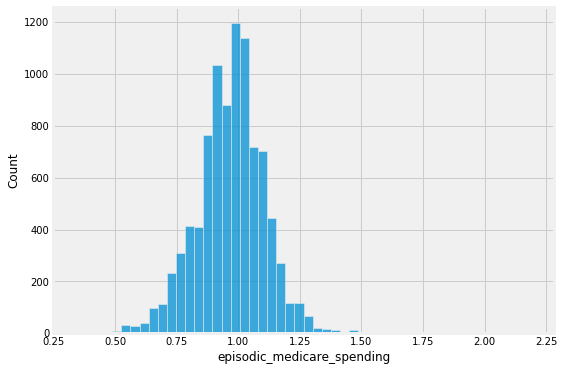

In [19]:
# EDA for target value, Episodic Medicare Spending
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(ax=ax, data=df, x='episodic_medicare_spending', bins=50);

In [20]:
print(f"Minimum percentage of medicare spending: {df['episodic_medicare_spending'].min()}")
print(f"Maximum percentage of medicare spending: {df['episodic_medicare_spending'].max()}")

Minimum percentage of medicare spending: 0.34
Maximum percentage of medicare spending: 2.19


count    9238.000000
mean        0.967738
std         0.139912
min         0.340000
25%         0.890000
50%         0.970000
75%         1.050000
max         2.190000
Name: episodic_medicare_spending, dtype: float64

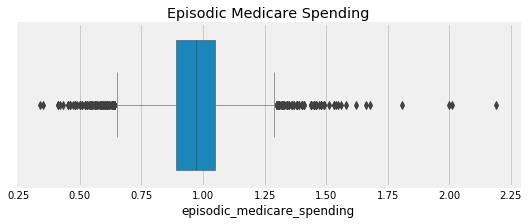

In [21]:
fig, ax = plt.subplots(figsize=(8, 3))
ax = sns.boxplot(x=df['episodic_medicare_spending'], linewidth=0.5);
plt.title('Episodic Medicare Spending')

df.episodic_medicare_spending.describe()

In [22]:
# Very slight right skew, confirmed with median and mean
print(f"Medicare spending median: {df.episodic_medicare_spending.median()}")
print(f"Medicare spending mean: {df.episodic_medicare_spending.mean()}")

Medicare spending median: 0.97
Medicare spending mean: 0.967737605542326


In [23]:
# Specify 'quality_rating' value visualization order for x-axis 
indexes = df['quality_rating'].astype(str).value_counts().sort_index()
index_list = list(indexes.index.values)
index_list

['1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', 'nan']

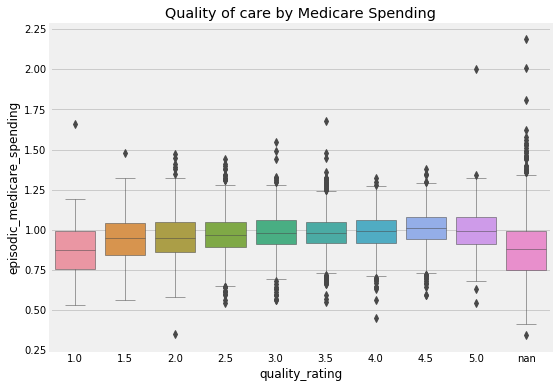

In [24]:
# Quality of care by Medicare Spending
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Quality of care by Medicare Spending')

sns.boxplot(x=df['quality_rating'].astype(str), y=df['episodic_medicare_spending'],
           linewidth=0.5, order=index_list);

In [25]:
# Slightly lower median spending rate for lower quality of care facilities
df.groupby('quality_rating')['episodic_medicare_spending'].describe()

,count,mean,std,min,25%,50%,75%,max
quality_rating,,,,,,,,
1.0,96.0,0.882396,0.167393,0.53,0.7575,0.875,0.9925,1.66
1.5,503.0,0.946720,0.145318,0.56,0.8400,0.950,1.0400,1.48
2.0,808.0,0.956869,0.142725,0.35,0.8600,0.950,1.0500,1.47
2.5,1135.0,0.971339,0.127019,0.54,0.8900,0.970,1.0500,1.44
3.0,1356.0,0.982286,0.122942,0.56,0.9100,0.980,1.0600,1.55
3.5,1456.0,0.984293,0.112599,0.55,0.9200,0.980,1.0500,1.68
4.0,1249.0,0.987326,0.108672,0.45,0.9200,0.990,1.0600,1.32
4.5,970.0,1.005732,0.109024,0.59,0.9400,1.010,1.0800,1.38
5.0,505.0,0.991366,0.129755,0.54,0.9100,0.990,1.0800,2.00


In [26]:
# Percent of quality_rating entries that are NaNs
pct_nans = ((df['quality_rating'].astype(str) == 'nan').sum()) / df.shape[0]
print(f"Percent of quality_rating entries that are NaNs: {round(pct_nans * 100, 2)}%")

Percent of quality_rating entries that are NaNs: 12.56%


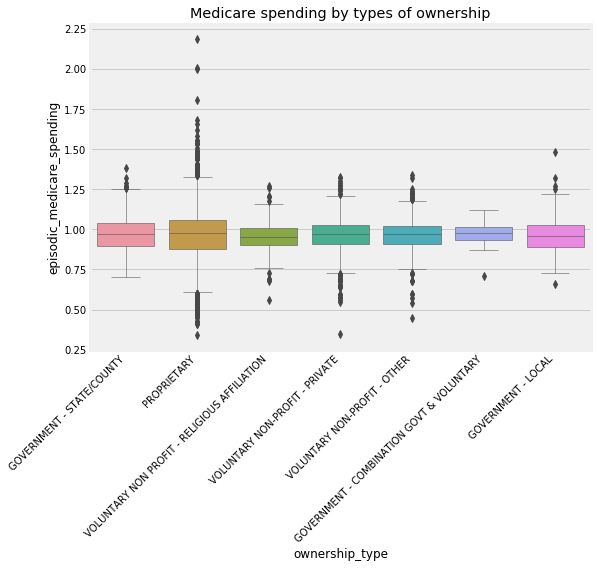

In [27]:
# Medicare spending by types of ownership
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x=df['ownership_type'], y=df['episodic_medicare_spending'],
           linewidth=0.5);

ax.set_title('Medicare spending by types of ownership')

# Use .get_xticklabels to retrieve list of 'ownership_types'
labels = [l.get_text() for l in ax.get_xticklabels()]
# Orient rotated 'ownership_type' labels 
plt.setp(ax.set_xticklabels(labels, ha='right'), rotation=45);

In [28]:
# Proprietary facilities have the largest spread, but are also the largest group by far
df.groupby('ownership_type')['episodic_medicare_spending'].describe()

,count,mean,std,min,25%,50%,75%,max
ownership_type,,,,,,,,
GOVERNMENT - COMBINATION GOVT & VOLUNTARY,18.0,0.967222,0.093167,0.71,0.9325,0.975,1.0150,1.12
GOVERNMENT - LOCAL,129.0,0.969302,0.124136,0.66,0.8900,0.960,1.0300,1.48
GOVERNMENT - STATE/COUNTY,224.0,0.976473,0.120502,0.70,0.8975,0.970,1.0425,1.38
PROPRIETARY,7309.0,0.968609,0.146749,0.34,0.8800,0.980,1.0600,2.19
VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,298.0,0.953792,0.092168,0.56,0.9000,0.950,1.0100,1.27
VOLUNTARY NON-PROFIT - OTHER,521.0,0.967236,0.105011,0.45,0.9100,0.970,1.0200,1.34
VOLUNTARY NON-PROFIT - PRIVATE,739.0,0.962192,0.114752,0.35,0.9100,0.970,1.0300,1.33


In [29]:
# sns.catplot(
#     x='DayOfWeek',
#     y='Sales',
#     data=store1_data,
#     kind='box',
# );

**Explore features, which are assumed to drive up costs**

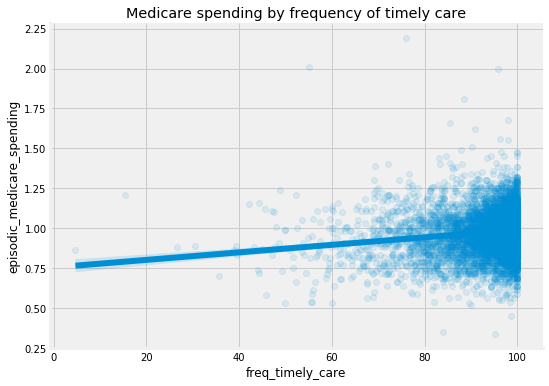

In [30]:
# Medicare spending by frequency of timely care
sns.lmplot(x='freq_timely_care', y='episodic_medicare_spending',
          data=df, aspect=1.5, scatter_kws={'alpha':0.1});

plt.title('Medicare spending by frequency of timely care');

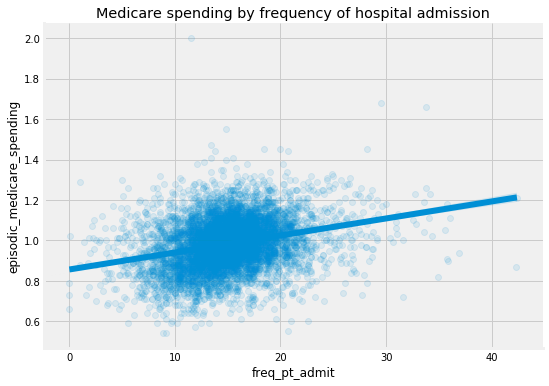

In [31]:
# Medicare spending by frequency of patient hospital admission
sns.lmplot(x='freq_pt_admit', y='episodic_medicare_spending',
           data=df, aspect=1.5, scatter_kws={'alpha':0.1});
        
plt.title('Medicare spending by frequency of hospital admission');

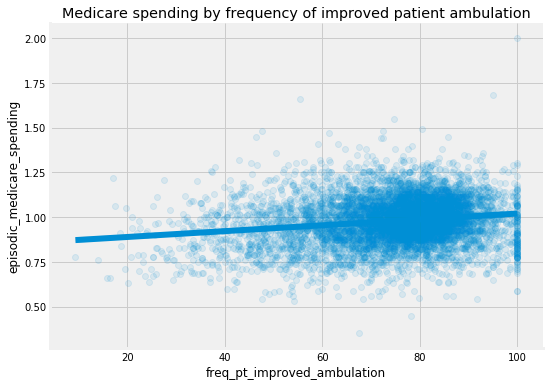

In [32]:
# Medicare spending by frequency of patient's improved ambulation
sns.lmplot(x='freq_pt_improved_ambulation', y='episodic_medicare_spending',
          data=df, aspect=1.5, scatter_kws={'alpha': 0.1});
plt.title('Medicare spending by frequency of improved patient ambulation');

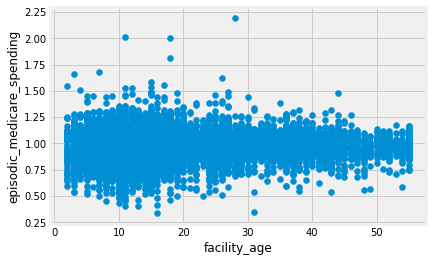

count    9238.000000
mean       20.776683
std        13.142709
min         2.000000
25%        11.000000
50%        16.000000
75%        29.000000
max        55.000000
Name: age_facility, dtype: float64

In [33]:
# Medicare spending by age of facility
from datetime import datetime

data = df.copy()

today = datetime.today()

# Parse 'date_certified' datetime to retrieve year only
data['year'] = pd.DatetimeIndex(data['date_certified']).year
# Calculate age of facility by subtracting 'year' of date certified from today's year
data['age_facility'] = today.year - data['year']

plt.scatter(data['age_facility'], data['episodic_medicare_spending'])
plt.xlabel('facility_age')
plt.ylabel('episodic_medicare_spending')
plt.show()

data['age_facility'].describe()

In [34]:
# Older facilities appear to streamline billing around 100% of 
#  Medicare spending, but there are also fewer facilities as
#  age of facility increases.

In [35]:
# Create a list of categorical features
categorical_feats = [x for x in df.columns if df[x].dtypes == 'O']
print(categorical_feats)

['state', 'cms_cert_number(ccn)', 'provider_name', 'address', 'city', 'zip', 'phone', 'ownership_type', 'nursing_care', 'physical_therapy', 'occupational_therapy', 'speech_pathology', 'medical_social', 'home_health_aide', 'quality_rating', 'footnote_quality_rating', 'footnote_freq_timely_care', 'footnote_freq_rx_ed', 'footnote_freq_flu_shot_documented', 'footnote_freq_pt_improved_ambulation', 'footnote_freq_pt_improved_bed_mobility', 'footnote_freq_pt_improved_bathing', 'footnote_freq_pt_improved_breathing', 'footnote_freq_pt_improved_rx_po', 'footnote_freq_pt_admit', 'footnote_freq_er_no_admit', 'footnote_freq_post-acute_pressure_ulcer/injury', 'footnote_freq_md_rec_completed_ontime', 'dtc_performance_categorization', 'footnote_dtc_performance_categorization', 'ppr_performance_categorization', 'footnote_ppr_performance_categorization', 'footnote_episodic_medicare_spending']


In [36]:
# Remove identification features from 'categorical_feats'
id_feats = ['cms_cert_number(ccn)', 'provider_name', 'address','phone']
for i in id_feats:
    categorical_feats.remove(i)
print(categorical_feats)

['state', 'city', 'zip', 'ownership_type', 'nursing_care', 'physical_therapy', 'occupational_therapy', 'speech_pathology', 'medical_social', 'home_health_aide', 'quality_rating', 'footnote_quality_rating', 'footnote_freq_timely_care', 'footnote_freq_rx_ed', 'footnote_freq_flu_shot_documented', 'footnote_freq_pt_improved_ambulation', 'footnote_freq_pt_improved_bed_mobility', 'footnote_freq_pt_improved_bathing', 'footnote_freq_pt_improved_breathing', 'footnote_freq_pt_improved_rx_po', 'footnote_freq_pt_admit', 'footnote_freq_er_no_admit', 'footnote_freq_post-acute_pressure_ulcer/injury', 'footnote_freq_md_rec_completed_ontime', 'dtc_performance_categorization', 'footnote_dtc_performance_categorization', 'ppr_performance_categorization', 'footnote_ppr_performance_categorization', 'footnote_episodic_medicare_spending']


In [37]:
# TODO: Creat visualizations for categorical features
# for feature in categorical_feats:
#     data = df.copy()
#     x = data.groupby(feature)['episodic_medicare_spending'].median()
#     plt.bar(x, height=10)
#     plt.xlabel(feature)
#     plt.ylabel('episodic_medicare_spending')
#     plt.title(feature)
#     plt.show()

### Feature Engineering

In [38]:
# Many columns are primarily null values
df.isnull().sum().sort_values(ascending=False)

footnote_episodic_medicare_spending               9238
footnote_dtc_performance_categorization           8719
footnote_freq_timely_care                         8556
footnote_freq_md_rec_completed_ontime             8542
footnote_freq_rx_ed                               8540
footnote_freq_flu_shot_documented                 8347
footnote_freq_post-acute_pressure_ulcer/injury    8229
footnote_freq_pt_improved_bathing                 8188
footnote_freq_pt_improved_ambulation              8180
footnote_freq_pt_improved_bed_mobility            8124
footnote_quality_rating                           8078
footnote_freq_pt_improved_rx_po                   8018
footnote_freq_pt_improved_breathing               7997
footnote_freq_pt_admit                            7688
footnote_freq_er_no_admit                         7688
footnote_ppr_performance_categorization           7183
ppr_numerator                                     2055
ppr_observed_rate                                 2055
ppr_risk-s

In [39]:
# 'footnote' columns are disproportionally filled with NaNs

# Confirm that these are the only two values for all other 'footnote' columns

footnotes = [
    'The number of patient episodes for this measure is too small to report.',
    'This measure currently does not have data or provider has been certified/recertified for less than 6 months.'
] # --> Previously seen in 'episodic_medicare_spending' EDA

# Create a set to hold unique values of footnote columns
cells_list = set()

# Loop through each column in df
for i in range(len(df.columns)):
    # Find the 'footnote' columns
    if 'footnote' in df.columns[i]:
        # Loop through rows in df
        for idx, data in df.iterrows():
            # Determine if value in column matches one of the 
            #   two values in 'footnotes' list 
            if df.loc[idx, df.columns[i]] != footnotes[0]:
                if df.loc[idx, df.columns[i]] != footnotes[1]:
                    # We're not interested in null values in this moment
                    if df.loc[idx, df.columns[i]] != None:
                        cells_list.add(df.loc[idx, df.columns[i]])
cells_list

{nan}

In [40]:
# Drop 'footnote' columns, since they are mostly populated by NaNs
#  explaining NaNs from numerical columns as 'lack of data'
for col in df.columns:
    if 'footnote' in col:
        df.drop([col], axis=1, inplace=True); 

In [41]:
df.shape

(9238, 44)

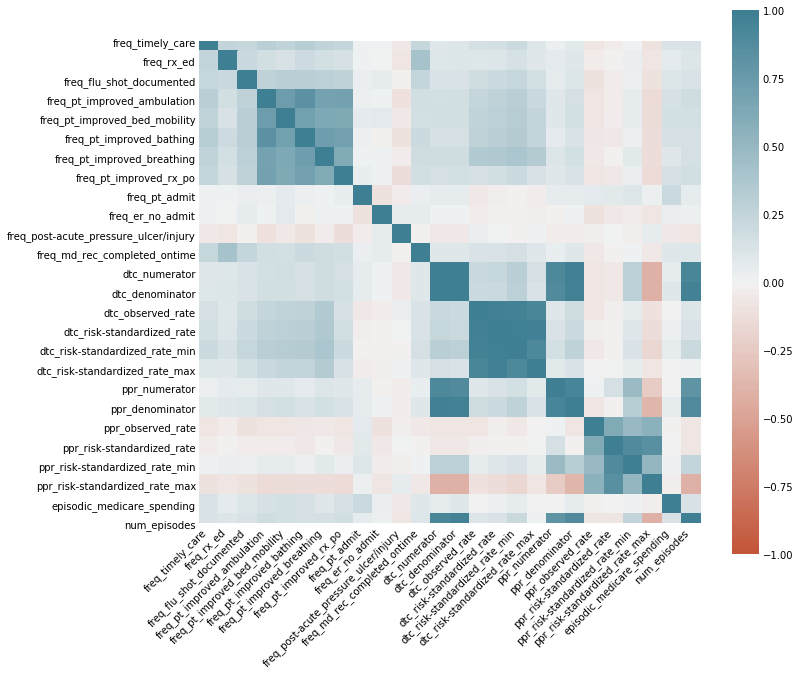

In [58]:
# Correlation heatmap
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))  
corr = df.corr()
ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
)
ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
);
# plt.savefig('corr_heatmap.png')

In [43]:
print(corr['episodic_medicare_spending'].sort_values(ascending=False))

episodic_medicare_spending               1.000000
freq_pt_admit                            0.277810
freq_pt_improved_bed_mobility            0.203179
freq_pt_improved_rx_po                   0.178104
freq_pt_improved_ambulation              0.175877
freq_pt_improved_bathing                 0.171315
freq_timely_care                         0.145735
num_episodes                             0.138876
freq_flu_shot_documented                 0.134077
freq_pt_improved_breathing               0.114886
freq_md_rec_completed_ontime             0.110620
dtc_denominator                          0.099939
freq_rx_ed                               0.075978
dtc_numerator                            0.068958
dtc_risk-standardized_rate_min           0.063332
ppr_denominator                          0.058071
freq_er_no_admit                         0.042343
dtc_risk-standardized_rate               0.030606
ppr_risk-standardized_rate_min           0.013349
ppr_numerator                           -0.001350


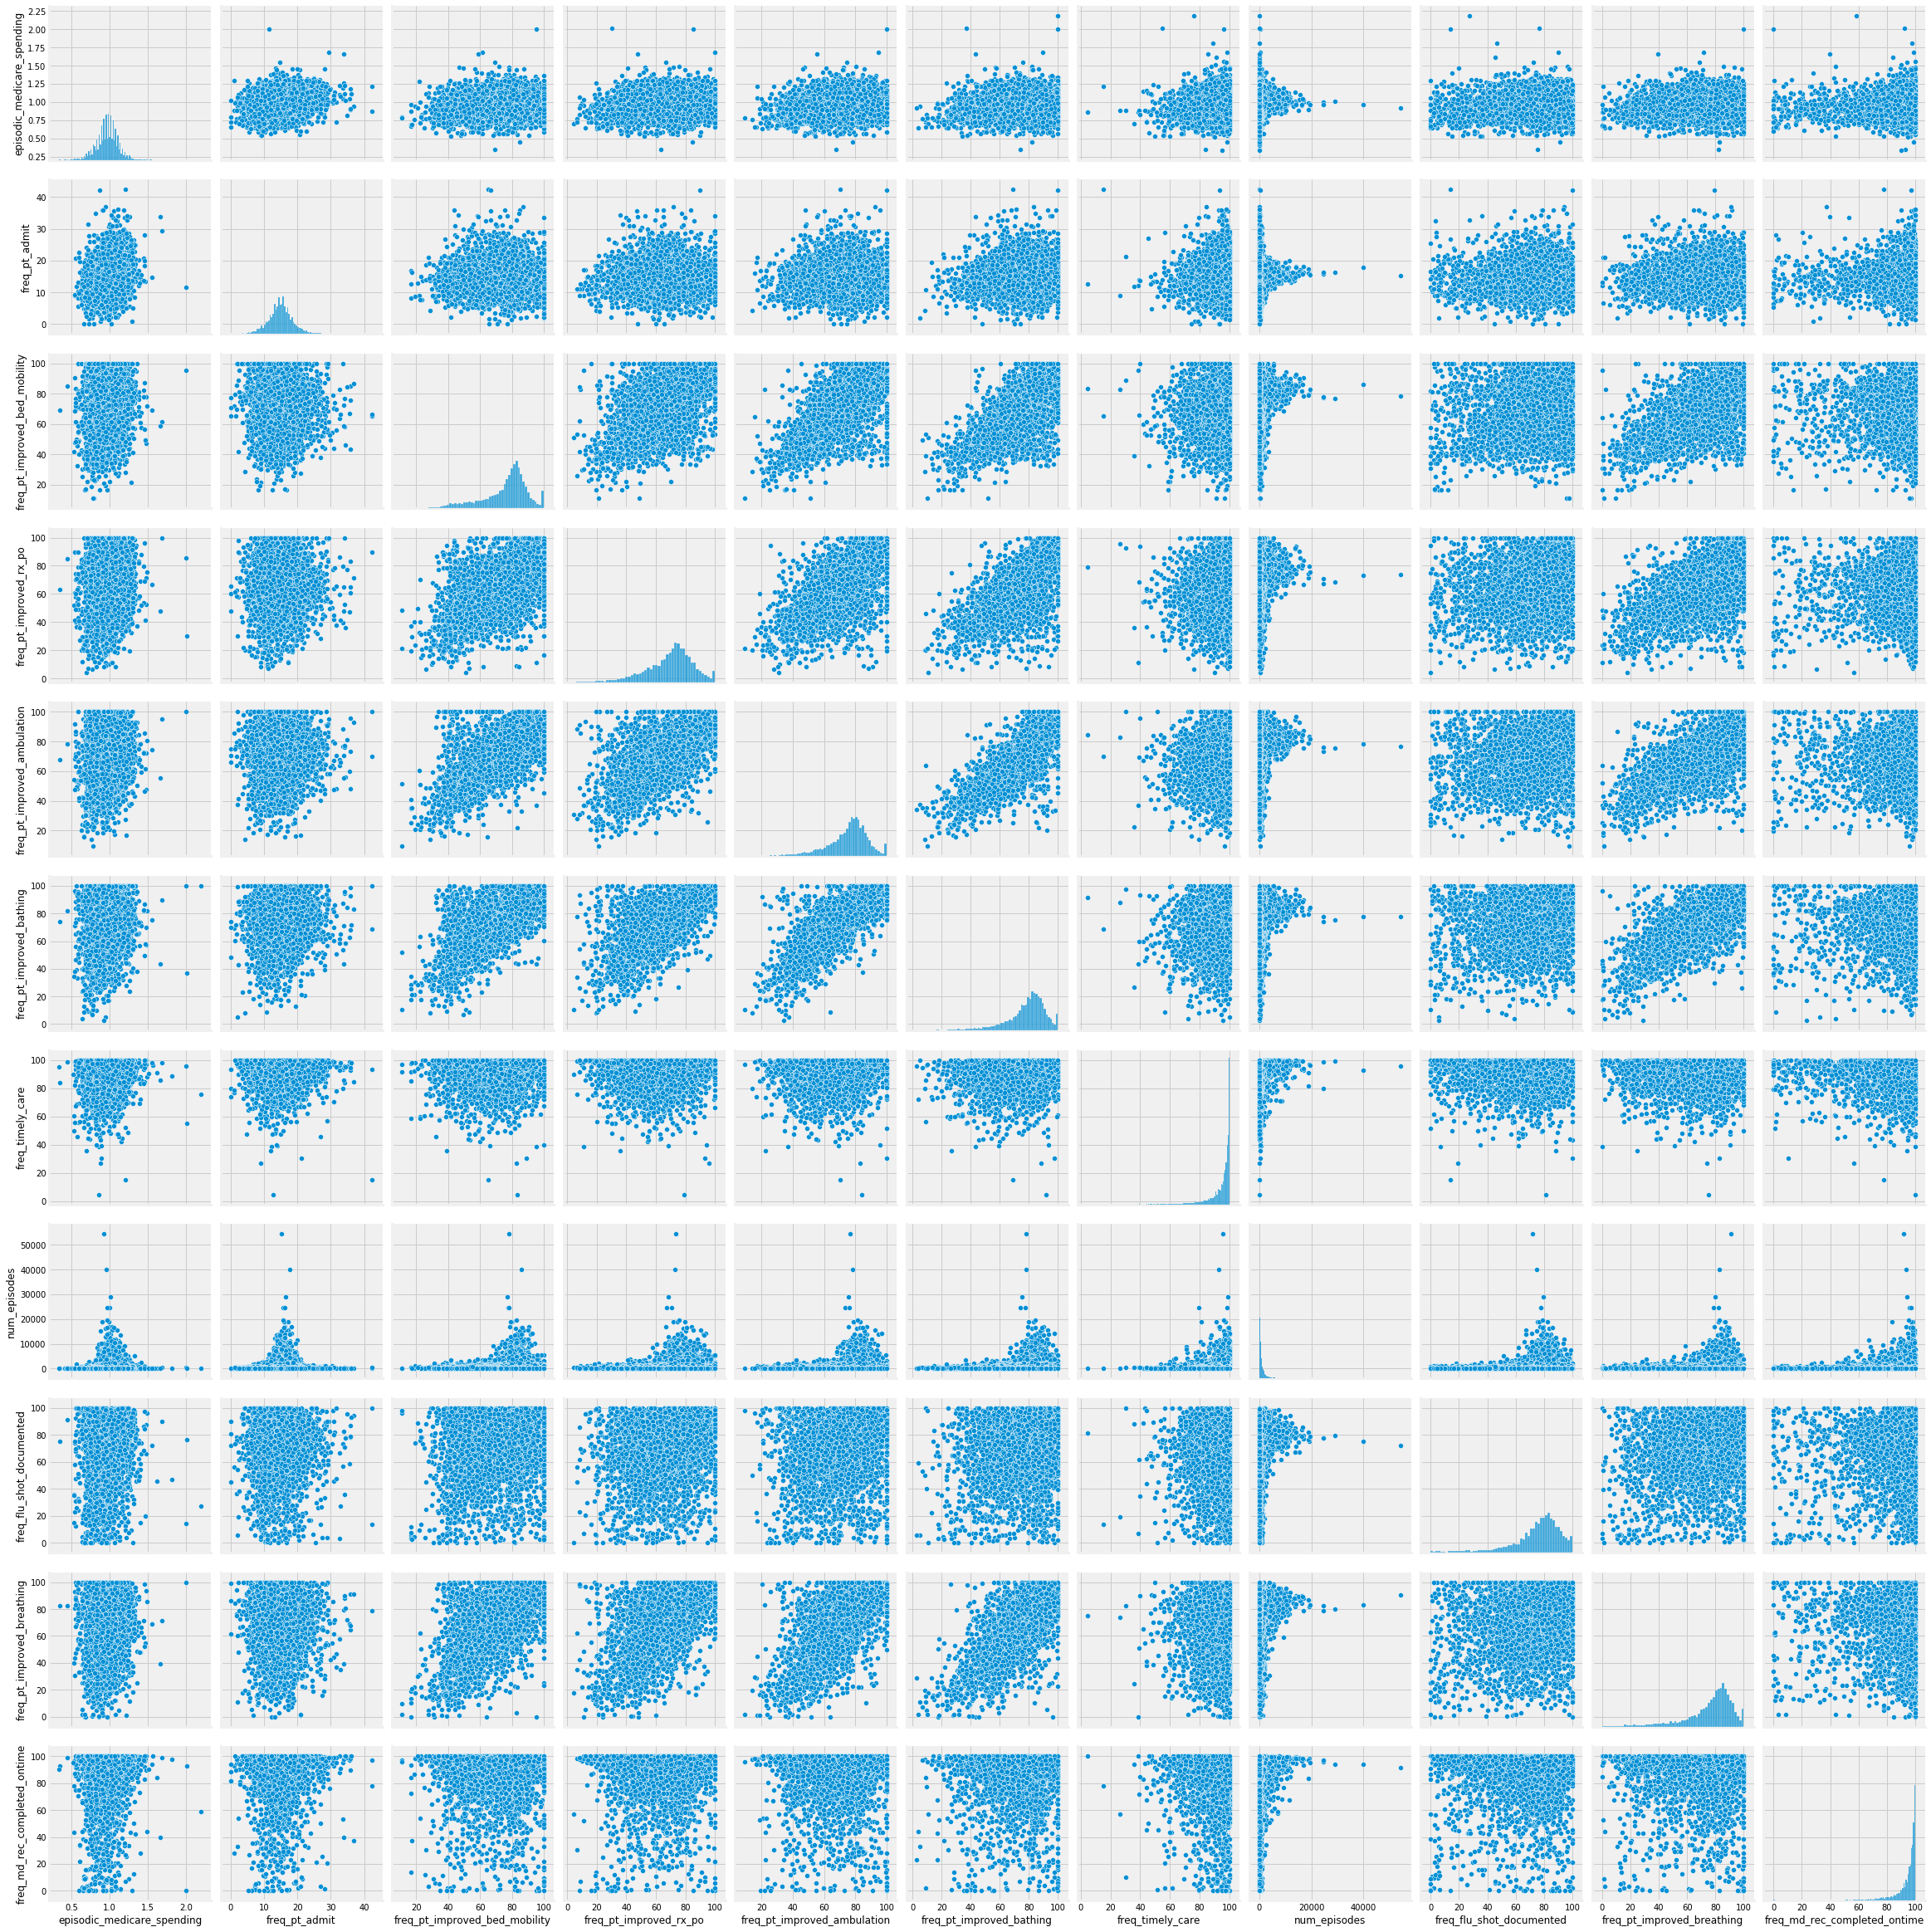

In [44]:
# Create a pairplot visualization for the most correlated features
selected_features = ['episodic_medicare_spending',
                     'freq_pt_admit',
                     'freq_pt_improved_bed_mobility',
                     'freq_pt_improved_rx_po',
                     'freq_pt_improved_ambulation',
                     'freq_pt_improved_bathing',
                     'freq_timely_care',
                     'num_episodes',
                     'freq_flu_shot_documented',
                     'freq_pt_improved_breathing',
                     'freq_md_rec_completed_ontime'
                    ]


sns.pairplot(df[selected_features], height=3);

**Impute Missing Values**

In [45]:
# Impute mode values for quality_rating
df['quality_rating'].fillna(df.quality_rating.astype(str).value_counts().index[0], inplace=True);

In [46]:
# Impute mean values for numerical columns
for col in df.columns:
    if (df[col].isnull().sum() > 0) and (df.dtypes[col] == 'float64'):
        df[col].fillna(df[col].mean(), inplace=True)

In [47]:
df.isnull().sum()

state                                    0
cms_cert_number(ccn)                     0
provider_name                            0
address                                  0
city                                     0
zip                                      0
phone                                    0
ownership_type                           0
nursing_care                             0
physical_therapy                         0
occupational_therapy                     0
speech_pathology                         0
medical_social                           0
home_health_aide                         0
date_certified                           0
quality_rating                           0
freq_timely_care                         0
freq_rx_ed                               0
freq_flu_shot_documented                 0
freq_pt_improved_ambulation              0
freq_pt_improved_bed_mobility            0
freq_pt_improved_bathing                 0
freq_pt_improved_breathing               0
freq_pt_imp

In [48]:
# Two features have two remaining null values each, impute mean
df['dtc_performance_categorization'].fillna(df['dtc_performance_categorization'].value_counts().index[0], inplace=True)
df['ppr_performance_categorization'].fillna(df['ppr_performance_categorization'].value_counts().index[0], inplace=True)

**Dummify Categorical Variables**

In [49]:
# Create an upadted list of categorical features
cat_feats = [feat for feat in df.columns if df[feat].dtypes == 'O']

# Remove identification features and location features from 'categorical_feats'
id_feats = ['state', 'city', 'zip',
            'cms_cert_number(ccn)', 
            'provider_name', 'address',
            'phone']
for i in id_feats:
    cat_feats.remove(i)
cat_feats

['ownership_type',
 'nursing_care',
 'physical_therapy',
 'occupational_therapy',
 'speech_pathology',
 'medical_social',
 'home_health_aide',
 'quality_rating',
 'dtc_performance_categorization',
 'ppr_performance_categorization']

In [50]:
technical_df = pd.get_dummies(df, columns=cat_feats, drop_first=True)

In [51]:
# Drop identification features
# Remove identification features and location features from 'categorical_feats'
technical_df.drop(id_feats, axis=1, inplace=True); 

In [52]:
technical_df.head()

,date_certified,freq_timely_care,freq_rx_ed,freq_flu_shot_documented,freq_pt_improved_ambulation,freq_pt_improved_bed_mobility,freq_pt_improved_bathing,freq_pt_improved_breathing,freq_pt_improved_rx_po,freq_pt_admit,freq_er_no_admit,freq_post-acute_pressure_ulcer/injury,freq_md_rec_completed_ontime,dtc_numerator,dtc_denominator,dtc_observed_rate,dtc_risk-standardized_rate,dtc_risk-standardized_rate_min,dtc_risk-standardized_rate_max,ppr_numerator,ppr_denominator,ppr_observed_rate,ppr_risk-standardized_rate,ppr_risk-standardized_rate_min,ppr_risk-standardized_rate_max,episodic_medicare_spending,num_episodes,ownership_type_GOVERNMENT - LOCAL,ownership_type_GOVERNMENT - STATE/COUNTY,ownership_type_PROPRIETARY,ownership_type_VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,ownership_type_VOLUNTARY NON-PROFIT - OTHER,ownership_type_VOLUNTARY NON-PROFIT - PRIVATE,physical_therapy_Yes,occupational_therapy_Yes,speech_pathology_Yes,medical_social_Yes,home_health_aide_Yes,quality_rating_1.5,quality_rating_2.0,quality_rating_2.5,quality_rating_3.0,quality_rating_3.5,quality_rating_4.0,quality_rating_4.5,quality_rating_5.0,quality_rating_3.5,dtc_performance_categorization_Not Available,dtc_performance_categorization_Same As National Rate,dtc_performance_categorization_Worse Than National Rate,ppr_performance_categorization_Not Available,ppr_performance_categorization_Same As National Rate,ppr_performance_categorization_Worse Than National Rate
0,1966-07-01,93.4,98.8,55.3,86.3,84.6,86.6,81.4,78.9,14.4,15.8,0.00,91.6,845.0,1066.0,79.27,88.24,85.77,90.90,16.0,434.0,3.69,3.34,2.50,4.39,0.89,2130,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1973-01-18,97.1,99.6,75.4,83.2,80.2,83.4,82.1,79.4,16.0,12.1,0.00,98.1,6741.0,8969.0,75.16,81.10,80.10,82.27,208.0,7190.0,2.89,2.95,2.60,3.31,0.99,19072,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1975-07-24,99.8,99.8,75.0,80.8,79.2,84.2,84.8,73.7,15.4,13.7,0.11,91.9,609.0,794.0,76.70,79.59,76.48,82.71,15.0,530.0,2.83,3.62,2.67,4.75,1.08,1734,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1975-09-04,99.6,99.0,67.3,82.8,82.0,90.2,89.2,83.5,11.0,16.4,0.10,96.8,370.0,474.0,78.06,83.12,79.41,86.89,14.0,345.0,4.06,3.56,2.62,4.84,0.98,882,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1976-06-09,99.4,100.0,85.7,85.1,87.2,88.0,92.3,84.0,15.7,16.9,0.06,96.0,592.0,730.0,81.10,84.63,81.94,87.71,12.0,424.0,2.83,3.34,2.48,4.54,0.99,1187,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


**Export technical_df for use in techinical notebook**

In [53]:
# Move target column to end of df by removing target feature column
df_y = technical_df.pop('episodic_medicare_spending')
# Then re-adding the column 
technical_df['episodic_medicare_spending'] = df_y
technical_df.head()

,date_certified,freq_timely_care,freq_rx_ed,freq_flu_shot_documented,freq_pt_improved_ambulation,freq_pt_improved_bed_mobility,freq_pt_improved_bathing,freq_pt_improved_breathing,freq_pt_improved_rx_po,freq_pt_admit,freq_er_no_admit,freq_post-acute_pressure_ulcer/injury,freq_md_rec_completed_ontime,dtc_numerator,dtc_denominator,dtc_observed_rate,dtc_risk-standardized_rate,dtc_risk-standardized_rate_min,dtc_risk-standardized_rate_max,ppr_numerator,ppr_denominator,ppr_observed_rate,ppr_risk-standardized_rate,ppr_risk-standardized_rate_min,ppr_risk-standardized_rate_max,num_episodes,ownership_type_GOVERNMENT - LOCAL,ownership_type_GOVERNMENT - STATE/COUNTY,ownership_type_PROPRIETARY,ownership_type_VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,ownership_type_VOLUNTARY NON-PROFIT - OTHER,ownership_type_VOLUNTARY NON-PROFIT - PRIVATE,physical_therapy_Yes,occupational_therapy_Yes,speech_pathology_Yes,medical_social_Yes,home_health_aide_Yes,quality_rating_1.5,quality_rating_2.0,quality_rating_2.5,quality_rating_3.0,quality_rating_3.5,quality_rating_4.0,quality_rating_4.5,quality_rating_5.0,quality_rating_3.5,dtc_performance_categorization_Not Available,dtc_performance_categorization_Same As National Rate,dtc_performance_categorization_Worse Than National Rate,ppr_performance_categorization_Not Available,ppr_performance_categorization_Same As National Rate,ppr_performance_categorization_Worse Than National Rate,episodic_medicare_spending
0,1966-07-01,93.4,98.8,55.3,86.3,84.6,86.6,81.4,78.9,14.4,15.8,0.00,91.6,845.0,1066.0,79.27,88.24,85.77,90.90,16.0,434.0,3.69,3.34,2.50,4.39,2130,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.89
1,1973-01-18,97.1,99.6,75.4,83.2,80.2,83.4,82.1,79.4,16.0,12.1,0.00,98.1,6741.0,8969.0,75.16,81.10,80.10,82.27,208.0,7190.0,2.89,2.95,2.60,3.31,19072,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.99
2,1975-07-24,99.8,99.8,75.0,80.8,79.2,84.2,84.8,73.7,15.4,13.7,0.11,91.9,609.0,794.0,76.70,79.59,76.48,82.71,15.0,530.0,2.83,3.62,2.67,4.75,1734,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1.08
3,1975-09-04,99.6,99.0,67.3,82.8,82.0,90.2,89.2,83.5,11.0,16.4,0.10,96.8,370.0,474.0,78.06,83.12,79.41,86.89,14.0,345.0,4.06,3.56,2.62,4.84,882,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.98
4,1976-06-09,99.4,100.0,85.7,85.1,87.2,88.0,92.3,84.0,15.7,16.9,0.06,96.0,592.0,730.0,81.10,84.63,81.94,87.71,12.0,424.0,2.83,3.34,2.48,4.54,1187,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.99


In [54]:
technical_df.to_csv(r'/Users/LiaG/Desktop/datasets/home_health_technical.csv', index=False)